In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
x = 6 * np.random.rand(100, 1) -  3
y = 0.5 *x**2 +  1.5 * x +  2 + np.random.randn(100, 1)

x.shape


(100, 1)

<Axes: >

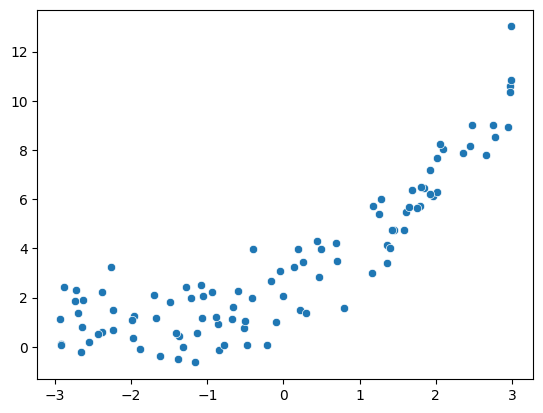

In [70]:
sns.scatterplot(x=x.ravel(),y=y.ravel())

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (80, 1)
x_test shape:  (20, 1)
y_train shape:  (80, 1)
y_test shape:  (20, 1)


R2 score:  0.7376642240361821


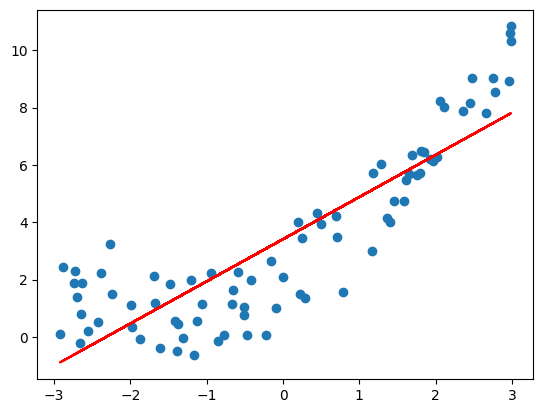

In [72]:
## Regression 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("R2 score: ", r2_score(y_test, y_pred))

plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color='red')
plt.show()

In [83]:
## Polynomial Linear Regression Degeree 2
from sklearn.preprocessing import PolynomialFeatures

ploy = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly =ploy.fit_transform(x_train)
x_test_poly =ploy.transform(x_test)
x_train_poly

array([[ 1.00000000e+00,  1.15995535e+00,  1.34549641e+00],
       [ 1.00000000e+00,  2.23192200e-01,  4.98147580e-02],
       [ 1.00000000e+00,  1.28431804e+00,  1.64947282e+00],
       [ 1.00000000e+00,  1.96612265e+00,  3.86563829e+00],
       [ 1.00000000e+00, -2.39002172e+00,  5.71220383e+00],
       [ 1.00000000e+00,  2.47503256e+00,  6.12578619e+00],
       [ 1.00000000e+00,  1.84475567e+00,  3.40312347e+00],
       [ 1.00000000e+00, -2.72542764e+00,  7.42795582e+00],
       [ 1.00000000e+00,  1.91946988e-01,  3.68436461e-02],
       [ 1.00000000e+00,  6.88090030e-01,  4.73467889e-01],
       [ 1.00000000e+00, -2.88886649e+00,  8.34554961e+00],
       [ 1.00000000e+00, -1.38577742e+00,  1.92037907e+00],
       [ 1.00000000e+00,  7.89193803e-01,  6.22826859e-01],
       [ 1.00000000e+00,  1.60498974e+00,  2.57599206e+00],
       [ 1.00000000e+00,  1.75289744e+00,  3.07264943e+00],
       [ 1.00000000e+00, -1.67387795e+00,  2.80186739e+00],
       [ 1.00000000e+00,  2.35825899e+00

R2 score:  0.8365761522165817
Coefficient:  [[0.         1.44719745 0.441215  ]]
Intercept:  [1.97686512]


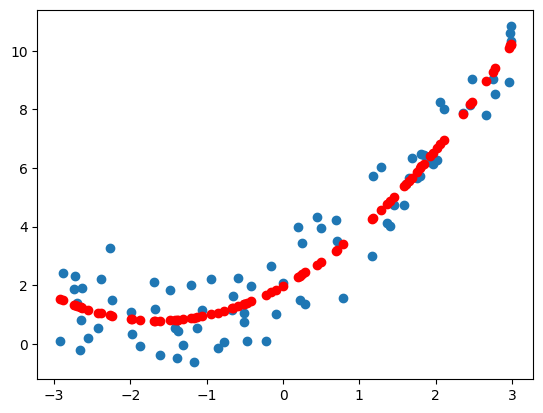

In [84]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

y_pred = model.predict(x_test_poly)

print("R2 score: ", r2_score(y_test, y_pred))
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

plt.scatter(x_train, y_train)
plt.scatter(x_train, model.predict(x_train_poly), color='red')
plt.show()

R2 score:  0.8205061852507005
Coefficient:  [[ 0.          1.820666    0.51348527 -0.15791355 -0.01040693  0.01370461]]
Intercept:  [1.93529834]


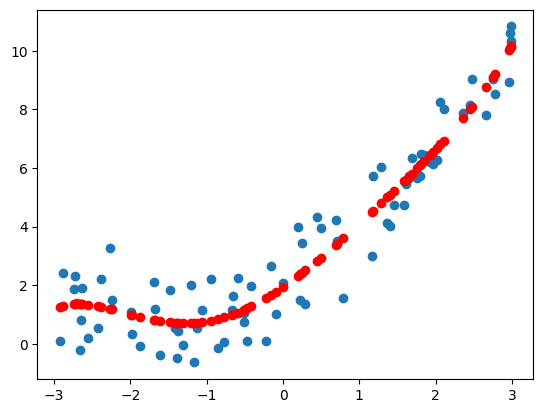

In [ ]:
## Polynomial Linear Regression Degree 3

ploy = PolynomialFeatures(degree=3,include_bias=True)
x_train_poly =ploy.fit_transform(x_train)
x_test_poly =ploy.transform(x_test)
x_train_poly

model = LinearRegression()
model.fit(x_train_poly, y_train)

y_pred = model.predict(x_test_poly)

print("R2 score: ", r2_score(y_test, y_pred))
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

plt.scatter(x_train, y_train)
plt.scatter(x_train, model.predict(x_train_poly), color='red')
plt.show()

In [76]:
# predction of new Data
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = ploy.transform(x_new)
y_new = model.predict(x_new_poly)


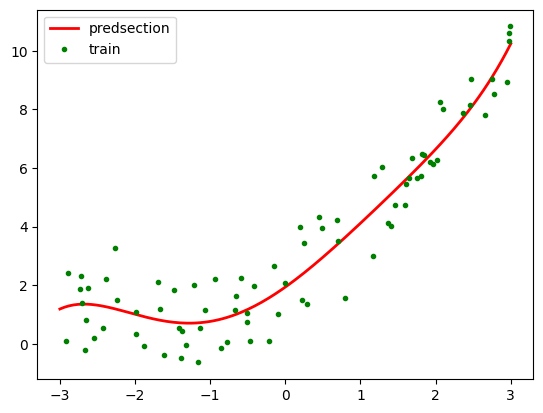

In [77]:
plt.plot(x_new,y_new,"r-",linewidth=2,label='predsection')
plt.plot(x_train,y_train,"g.",linewidth=2,label='train')
plt.legend(loc='upper left')
plt.show()

In [88]:
# PipeLine

from sklearn.pipeline import Pipeline

def poly_pipeline(degree):
    x_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features  = PolynomialFeatures(degree=degree,include_bias=True)
    model = LinearRegression()
    poly_reg = Pipeline([
        ("poly_features", poly_features),
        ("linear_reg", model)
    ])
    poly_reg.fit(x_train, y_train)
    y_pred = poly_reg.predict(x_new)
    plt.plot(x_new,y_pred,"r-",linewidth=2,label='predsection')
    plt.plot(x_train,y_train,"g.",linewidth=2,label='train')
    plt.legend(loc='upper left')
    plt.show()


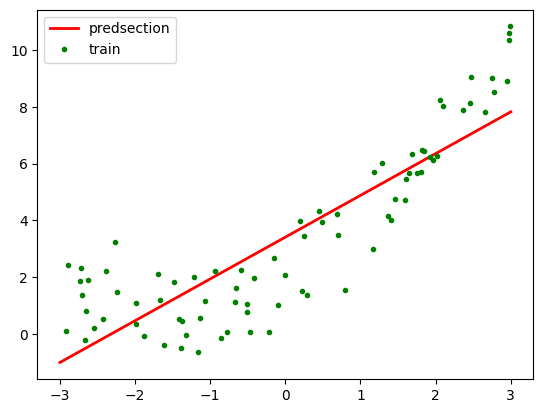

In [89]:
poly_pipeline(1)

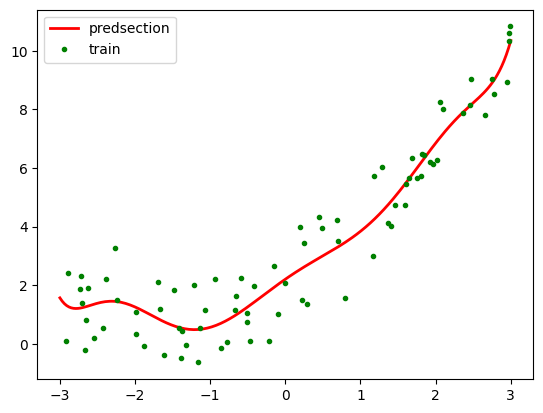

In [95]:
poly_pipeline(8)